In [1]:
# Change to '/data/images/Train/' to use all the 10k images
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import os
from random import shuffle


/home/ankur/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import cv2
import PIL.Image as Image

cap = cv2.VideoCapture('test2.mp4')
count = 0
X = []
while(cap.isOpened()):
    ret, frame = cap.read()


    if ret==False:
        break
    frame = cv2.resize(frame,(256,256))
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    pil_im = Image.fromarray(frame)
    
    count+=1
    
    X.append(img_to_array(pil_im))

cap.release()



In [3]:
len(X)
X = np.array(X,dtype=float)
shuffle(X)

In [4]:
type(X)

numpy.ndarray

In [5]:
def mse(arr):
    return np.mean(np.square(arr))

In [6]:
x = [mse(X[i]) for i in range(len(X))]

In [7]:
y=range(len(x))

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

X1 = np.array(list(zip(x,np.zeros(len(x)))), dtype=np.int)
bandwidth = estimate_bandwidth(X1, quantile=0.13)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k in range(n_clusters_):
    my_members = labels == k
    print("cluster {0}: {1}".format(k, X1[my_members, 0]))

cluster 0: [   0    0    0 ... 1981 2665 1886]
cluster 1: [35449 35409 36268 35049 35409 35049 35724 35449 36268 34503 34503 36268
 33566 33476 35049 35724 33478 33603 35724 34024 33604 34041 35049 34041
 33411 33552 36268 35049 35724 33476 33968 35449 34102 35449 35049 33488
 34100 35049 35449 33476 34138 35049 33544 33411 31882 34098 33939 35449
 33604 34024 35409 33477 35724 33476 33939 33939 33575 33603 33939 33544
 34041 33972 33939 33939 33411 35049 33544 33758 33513 35379 33939 33939
 33488 33939 35049 33411 33972 33444 33972 34098 33939 35449 33698 33604
 33450 33478 33970 33477 33758 36384 34101 33939 33411 34503 34130 36268
 33939 33476 33544 34130 33939 34130 31882 34130 33939 35049 34102 34130
 33488 33544 34130 33544 33603 31367 34101 36268 35724 35692 35627 33476
 34130 34130 33968 34130 33476 34130 33450 33758 31367 34100 34130 33476
 33477 33939 34130 34130 33566 33939 33758 35724 35379 31367 35049 33939
 34130 33476 36268 34130 33604 33972 33939 34130 35049 36268 33477

In [10]:
cluster_centers

array([[ 2616.26781116,     0.        ],
       [34191.91884058,     0.        ],
       [56944.6746988 ,     0.        ],
       [12545.57142857,     0.        ],
       [47013.94117647,     0.        ],
       [40015.8974359 ,     0.        ],
       [22136.69565217,     0.        ]])

In [11]:
dict={}
for i in range(len(labels_unique)):
    dict[i]=0
for i in range(len(x)):
    dict[labels[i]]+=1
print(dict)

{0: 1170, 1: 347, 2: 168, 3: 117, 4: 61, 5: 40, 6: 33}


In [12]:
labels_unique

array([0, 1, 2, 3, 4, 5, 6])

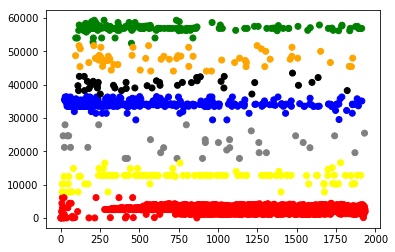

In [13]:
colorcode = ['red','blue','green','yellow','orange','black','grey','brown','pink','purple','violet','magenta','cyan']
cs = [colorcode[labels[i]] for i in range(len(x))]
plt.scatter(y,x,color=cs)

In [14]:
def ratio_conv(arr):
    x = min(arr)
    return [round(arr[i]/(x*1.0)) for i in range(len(arr))]

In [15]:
print([dict[i] for i in range(len(labels_unique))])
rc = ratio_conv([dict[i] for i in range(len(labels_unique))])
print(rc)

[1170, 347, 168, 117, 61, 40, 33]
[35, 11, 5, 4, 2, 1, 1]


In [16]:
label_indices = [[] for i in range(len(labels_unique))]
for i in range(len(labels)):
    label_indices[labels[i]].append(i)
#print label_indices
label_indices = np.array(label_indices)
d_x =[]
t =[]
for i in range(len(labels_unique)):
    label_indices[i].sort()
    for j in range(0,len(label_indices[i]),int(len(label_indices[i])/rc[i])):
        print(j,x[label_indices[i][j]])
        d_x.append(X[label_indices[i][j]])


0 0.0
33 2526.1838887532554
66 2815.167714436849
99 2819.8684844970703
132 2848.503260294596
165 3605.085174560547
198 3495.3980712890625
231 3686.6431325276694
264 2842.253992716471
297 3727.5383809407554
330 2528.9642537434897
363 3585.4701182047525
396 1057.6953735351562
429 2685.7794240315757
462 3019.041203816732
495 1126.317362467448
528 2700.3821004231772
561 1238.9703928629558
594 3528.4395599365234
627 3404.696258544922
660 2210.764129638672
693 3755.0969899495444
726 1087.4944101969402
759 3504.9053802490234
792 3578.3919118245444
825 2539.7157847086587
858 4017.9180297851562
891 1014.1313069661459
924 3213.8885599772134
957 3929.2423299153647
990 2277.784683227539
1023 2672.418467203776
1056 3997.8734130859375
1089 2224.8023071289062
1122 1072.4587097167969
1155 2665.6427408854165
0 35449.518086751305
31 35449.518086751305
62 33939.85083516439
93 34503.08545939127
124 33476.04765828451
155 34130.66307067871
186 33411.790100097656
217 36384.05699157715
248 34130.68739318848
2

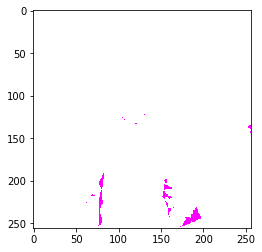

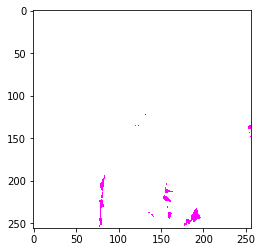

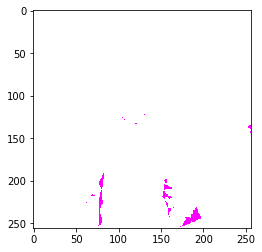

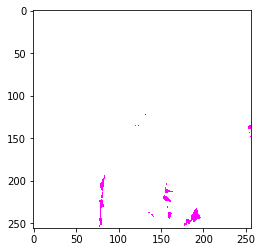

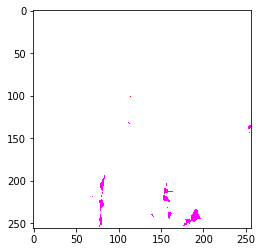

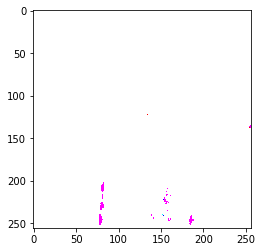

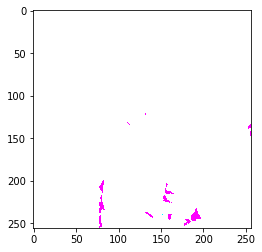

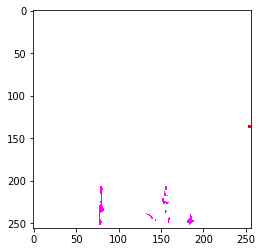

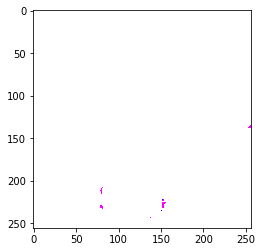

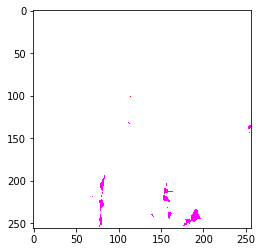

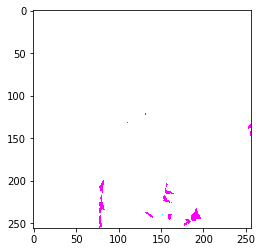

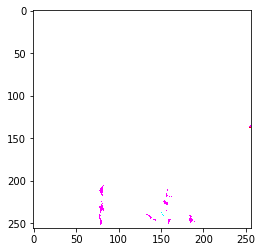

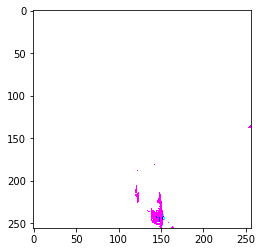

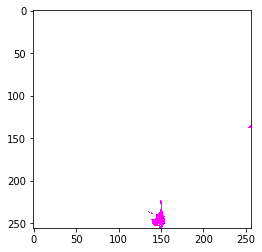

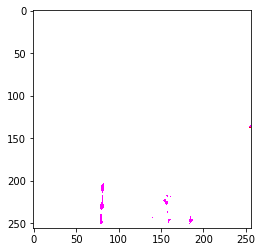

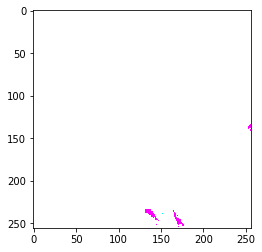

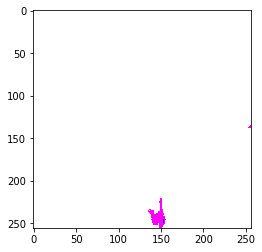

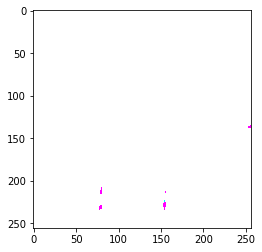

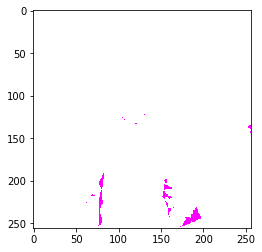

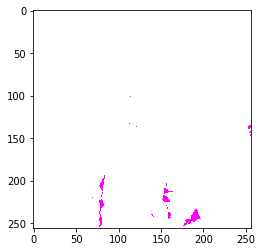

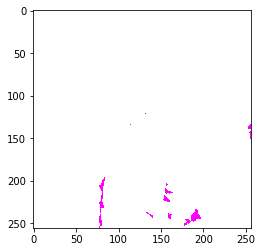

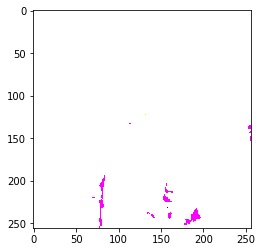

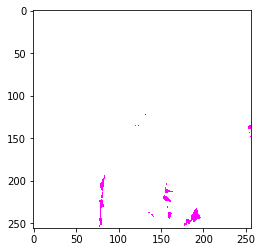

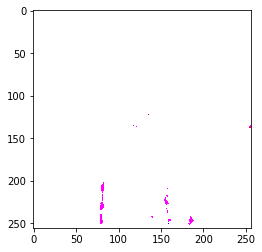

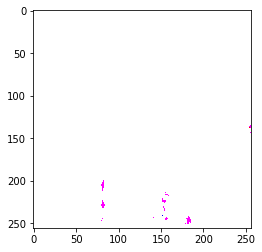

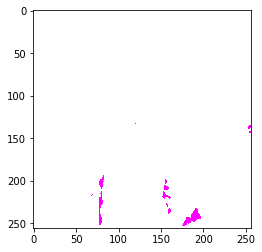

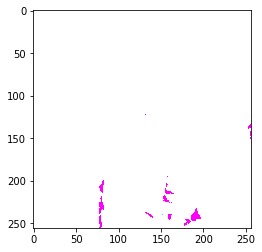

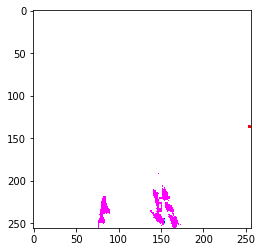

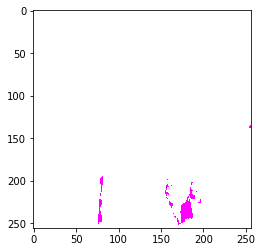

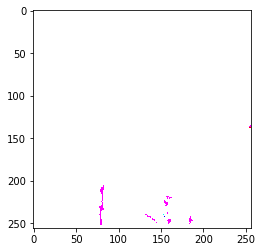

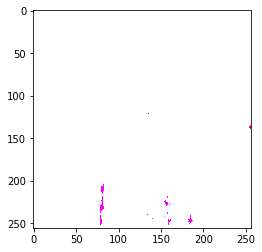

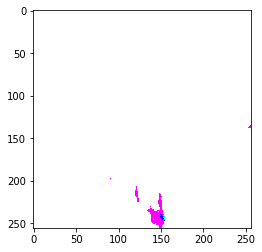

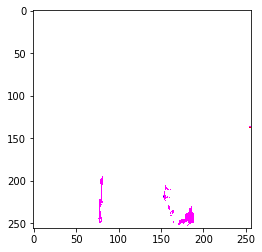

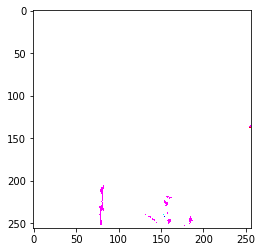

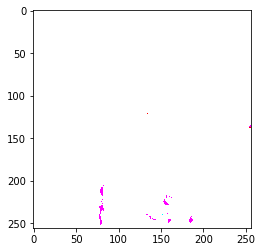

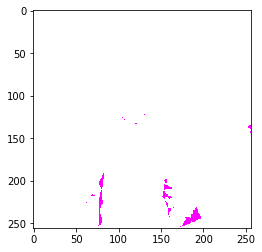

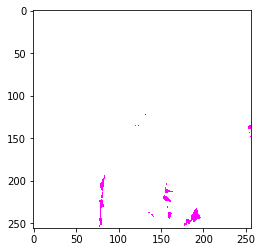

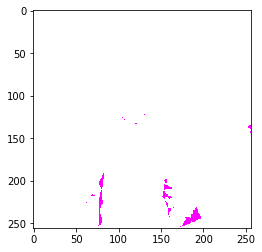

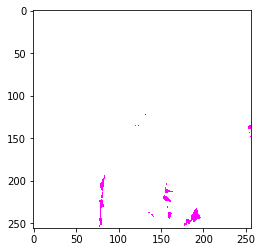

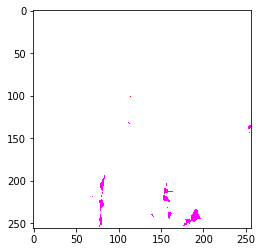

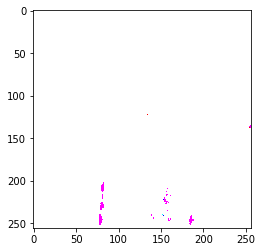

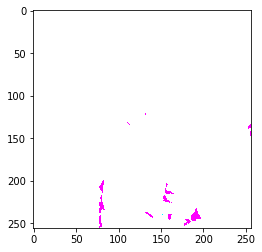

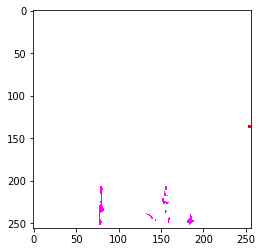

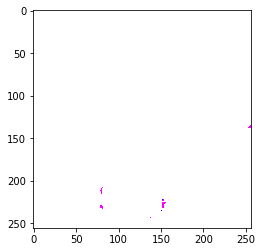

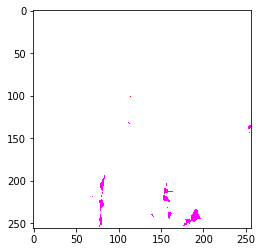

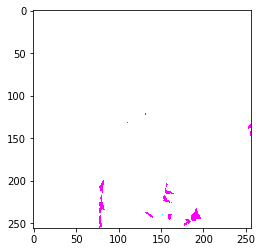

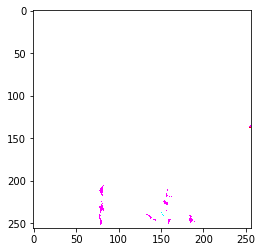

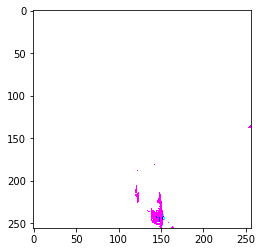

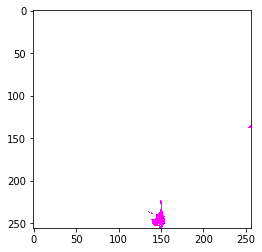

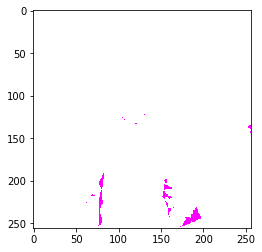

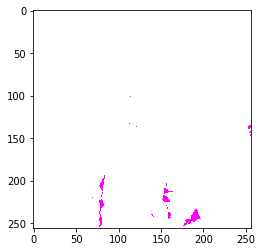

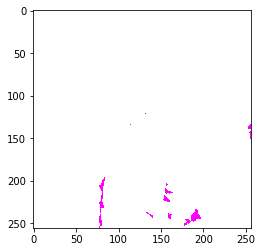

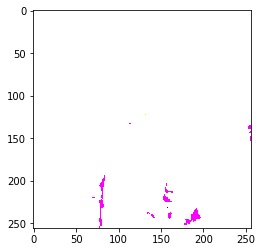

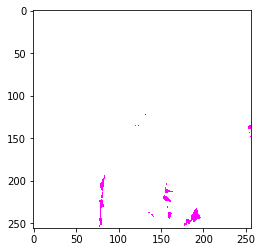

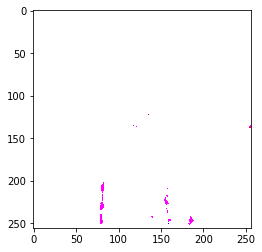

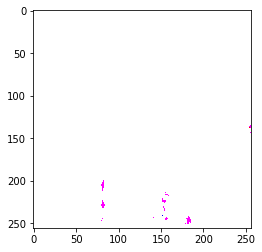

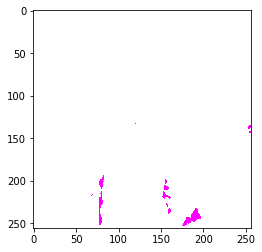

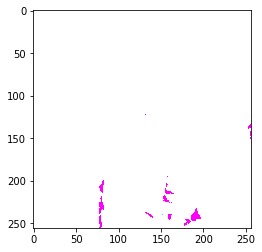

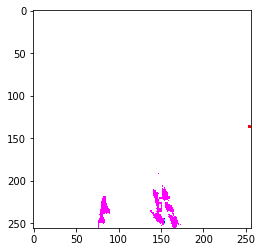

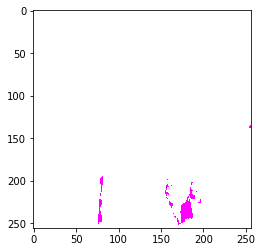

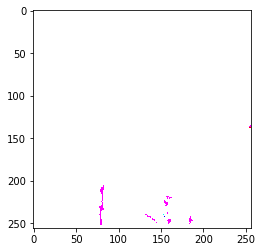

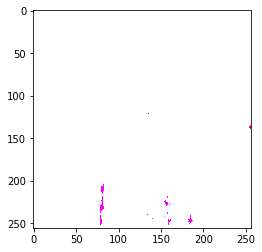

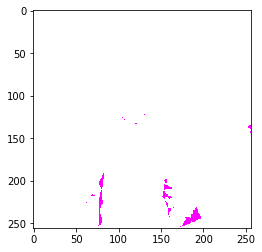

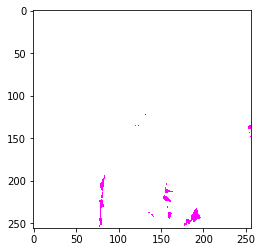

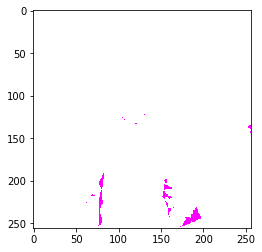

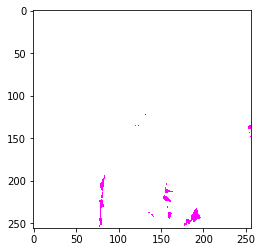

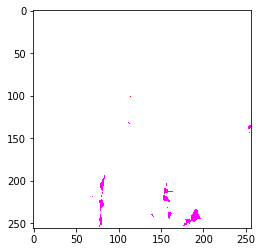

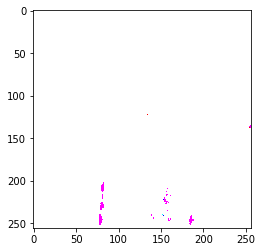

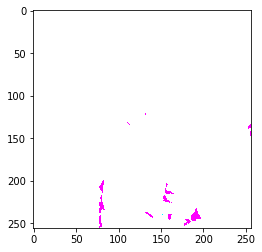

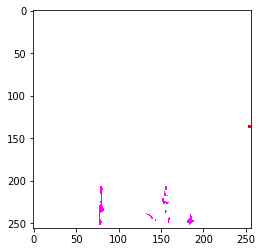

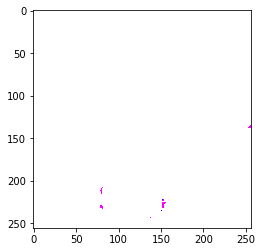

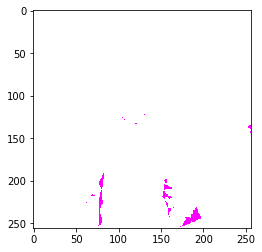

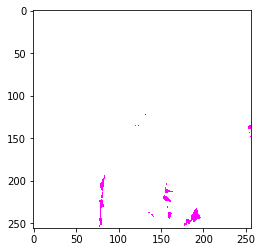

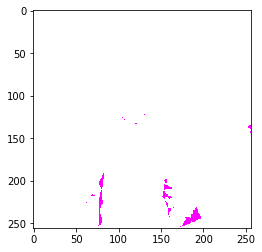

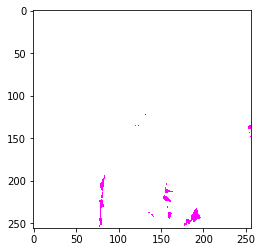

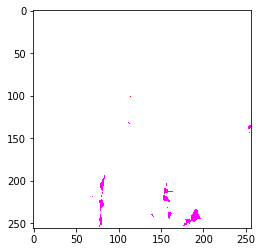

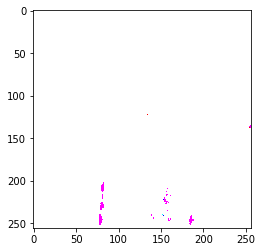

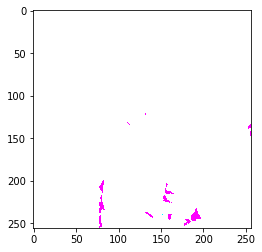

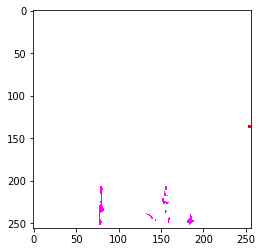

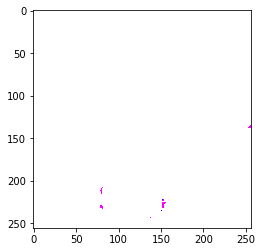

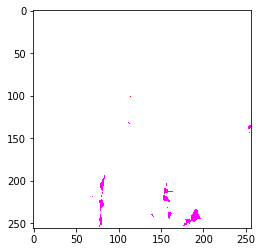

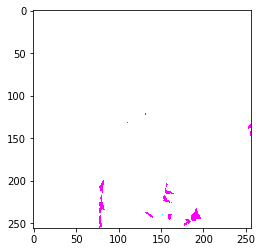

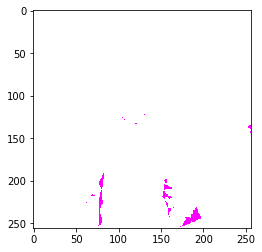

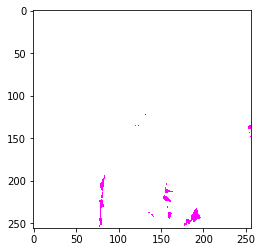

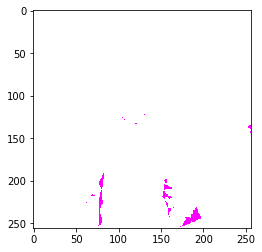

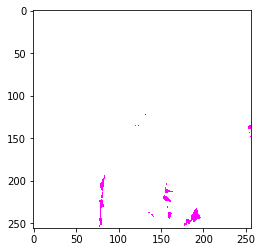

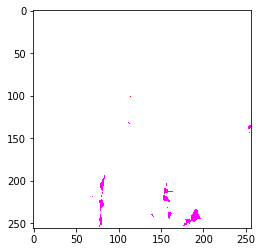

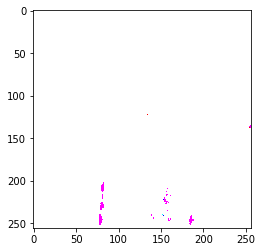

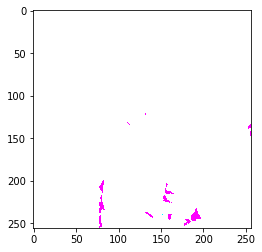

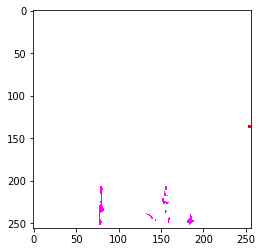

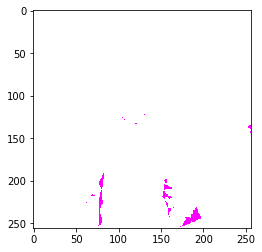

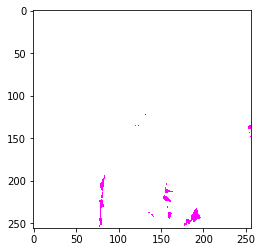

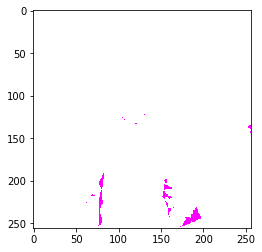

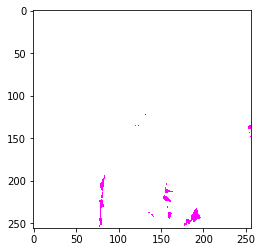

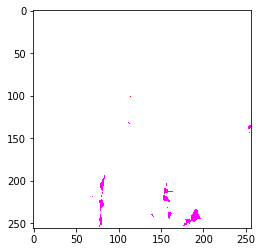

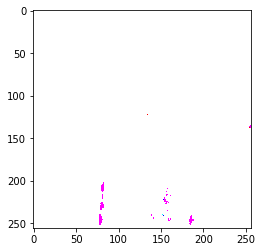

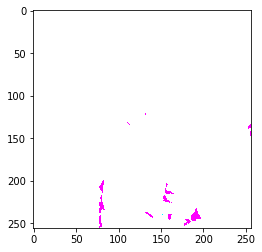

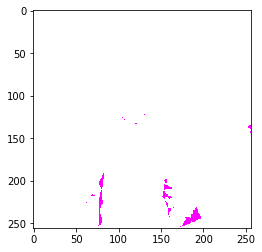

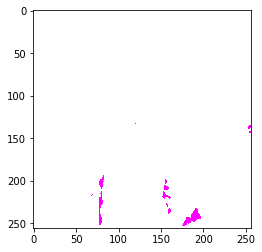

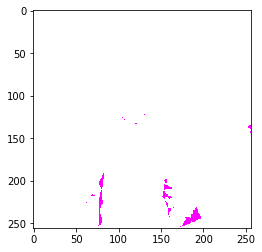

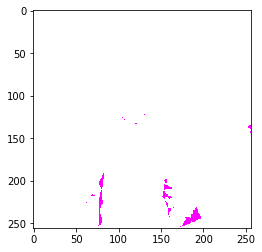

In [25]:
for i in range(len(d_x)):
    plt.imshow(d_x[i])
    plt.show()

In [17]:
len(d_x)

64

In [18]:
for i in range(len(d_x)):
    imsave('./feature_imagestest2/'+str(i)+'.jpg',d_x[i]*1.0/255.0)

/home/ankur/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ./feature_imagestest2/0.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ankur/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/ankur/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ./feature_imagestest2/54.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ankur/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ./feature_imagestest2/63.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


In [23]:
import os

In [24]:
os.makedir('feature_images_cv')

AttributeError: module 'os' has no attribute 'makedir'